<a href="https://colab.research.google.com/github/swapnilmn/Assignment_1-CS6910/blob/master/Assignment_1_Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4 (10 Marks) Use the sweep functionality provided by wandb to find the best values for the hyperparameters listed below. Use the standard train/test split of fashion_mnist (use (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()). Keep 10% of the training data aside as validation data for this hyperparameter search. Here are some suggestions for different values to try for hyperparameters. As you can quickly see that this leads to an exponential number of combinations. You will have to think about strategies to do this hyperparameter search efficiently. Check out the options provided by wandb.sweep and write down what strategy you chose and why.

        number of epochs: 5, 10
        number of hidden layers: 3, 4, 5
        size of every hidden layer: 32, 64, 128
        weight decay (L2 regularisation): 0, 0.0005, 0.5
        learning rate: 1e-3, 1 e-4
        optimizer: sgd, momentum, nesterov, rmsprop, adam, nadam
        batch size: 16, 32, 64
        weight initialisation: random, Xavier
        activation functions: sigmoid, tanh, ReLU
wandb will automatically generate the following plots. Paste these plots below using the "Add Panel to Report" feature. Make sure you use meaningful names for each sweep (e.g. hl_3_bs_16_ac_tanh to indicate that there were 3 hidden layers, batch size was 16 and activation function was ReLU) instead of using the default names (whole-sweep, kind-sweep) given by wandb.

# Libraries 

In [1]:
from keras.datasets import fashion_mnist, mnist
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from sklearn.model_selection import train_test_split 
import pickle
import pandas as pd
import os
from tqdm import tqdm_notebook 

In [2]:
!pip install wandb
import wandb
wandb.login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=b0787903ea3bdc7f7a94507e1fd364bbefe576d48bf7599e17d74ff36a5dc797
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Data Processing

In [3]:
import numpy as np
class OneHotEncoder_:
    
    def __init__(self):
        self.categories = None
        
    def fit(self, X):
        self.categories = []
        for i in range(X.shape[1]):
            feature_categories = list(set(X[:, i]))
            self.categories.append(feature_categories)
            
    def transform(self, X):
        one_hot_matrix = []
        for i in range(X.shape[0]):
            one_hot_row = []
            for j in range(X.shape[1]):
                category_index = self.categories[j].index(X[i, j])
                category_one_hot = [0] * len(self.categories[j])
                category_one_hot[category_index] = 1
                one_hot_row.extend(category_one_hot)
            one_hot_matrix.append(one_hot_row)
        return np.array(one_hot_matrix)
X = np.array([[1],[2]]) 
enc = OneHotEncoder_()
print(enc.fit(X))
enc.transform(X)

None


array([[1, 0],
       [0, 1]])

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

dataset = 'fashion_mnist'
if dataset == 'fashion_mnist':
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
elif dataset == 'mnist':
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
else:
    raise ValueError('Invalid dataset name')

X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

train_input = []
for i in range(len(X_train)):
    train_input.append(list(np.concatenate(X_train[i]).flat))

val_input = []
for i in range(len(X_val)):
    val_input.append(list(np.concatenate(X_val[i]).flat))

test_input = []
for i in range(len(test_images)):
    test_input.append(list(np.concatenate(test_images[i]).flat))

Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(test_labels)

X_train = np.array(train_input) / 255.0
X_test = np.array(test_input) / 255.0
X_val = np.array(val_input) / 255.0

enc = OneHotEncoder_()
enc.fit(Y_train.reshape(-1, 1))
Y_train = enc.transform(Y_train.reshape(-1, 1))
Y_val = enc.transform(Y_val.reshape(-1, 1))
Y_test = enc.transform(Y_test.reshape(-1, 1))

print(Y_train.shape, Y_val.shape, Y_test.shape)
print(X_train.shape, X_val.shape, X_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
(54000, 10) (6000, 10) (10000, 10)
(54000, 784) (6000, 784) (10000, 784)


# FFNW Class

In [ ]:
wandb.init(project = 'Question_5')

class FFNetwork:
  def __init__(self, X, Y,
               epochs = 100, 
               hidden_layer_count = 4,
               hidden_layers =  [32, 64, 128, 256],
               learning_rate = 0.001,
               batch_size = 32,
               activation='tanh',
               weight_init='random',
               loss = 'MSE',
               weight_decay = 0):
    
    self.inputs =X.shape[1] # Number of inputs
    self.outputs= Y.shape[1] # Number of outputs
    self.epochs = epochs
    self.hidden_layers = hidden_layer_count  # Number of hidden layers 
    self.network_size= [self.inputs] + hidden_layers +[self.outputs] # input layer + hidden layers + output layers
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.weights={} # It will create dictionary for weights and biases
    self.weights_h = []
    self.num_classes = Y.shape[1]
    self.weight_init = weight_init
    self.activation_function = activation
    self.loss_function = loss
    self.lambd = 0
    np.random.seed(0)  # We will set seed value so that it will generate same random numebers every time

    self.grad_derivatice={}
    self.update_weights={}
    self.prev_update_weights={}
    for i in range(1,self.hidden_layers+1):
      vw_key, vb_key, mb_key, mw_key = [f"{key}{i}" for key in ['vw', 'vb', 'mb', 'mw']]
      self.update_weights[vw_key]=0
      self.update_weights[vb_key]=0
      self.update_weights[mb_key]=0
      self.update_weights[mw_key]=0
      self.prev_update_weights[vw_key]=0
      self.prev_update_weights[vb_key]=0

    
    if self.weight_init == 'random':
      for i in range(1, self.hidden_layers + 2):
          weight_shape = (self.network_size[i - 1], self.network_size[i])
          weight_scale = 0.1
          self.weights[f'W{i}'] = np.random.normal(scale=weight_scale, size=weight_shape)*0.1
          
          bias_shape = (1, self.network_size[i])
          self.weights[f'B{i}'] = np.zeros(bias_shape)

    if self.weight_init == 'Xavier':
      for i in range(1, self.hidden_layers + 2):
          weight_shape = (self.network_size[i - 1], self.network_size[i])
          weight_scale = 0.1
          self.weights[f'W{i}'] = np.random.normal(scale=weight_scale, size=weight_shape)*np.sqrt(1/self.network_size[i-1])
          
          bias_shape = (1, self.network_size[i])
          self.weights[f'B{i}'] = np.zeros(bias_shape)

  def forward_activation(self, X):
      activation_functions = {
          'sigmoid': lambda x: 1.0 / (1.0 + np.exp(-x)),
          'tanh': np.tanh,
          'Relu': lambda x: np.maximum(0, x)
      }
      activation_function = activation_functions.get(self.activation_function)
      if activation_function:
          return activation_function(X)
      else:
          raise ValueError(f"Unknown activation function '{self.activation_function}'")


  def grad_activation(self, X):
      activation_gradients = {
          'sigmoid': lambda x: x * (1 - x),
          'tanh': lambda x: 1 - np.square(x),
          'Relu': lambda x: 1.0 * (x > 0)
      }
      gradient_function = activation_gradients.get(self.activation_function)
      if gradient_function:
          return gradient_function(X)
      else:
          raise ValueError(f"Unknown activation function '{self.activation_function}'")


  def softmax(self, X):
    exps =np.exp(X - np.max(X, axis=1, keepdims=True))
    return  exps /np.sum(exps, axis=1, keepdims=True)
  

  def forward_pass(self, X, weights=None):
      if weights is None:
          weights = self.weights
      self.A = {}
      self.H = {}
      self.H[0] = X
      for i in range(self.hidden_layers):
          self.A[i+1] = self.H[i] @ weights[f'W{i+1}'] + weights[f'B{i+1}']
          self.H[i+1] = self.forward_activation(self.A[i+1])
      self.A[self.hidden_layers+1] = self.H[self.hidden_layers] @ weights[f'W{self.hidden_layers+1}'] + weights[f'B{self.hidden_layers+1}']
      self.H[self.hidden_layers+1] = self.softmax(self.A[self.hidden_layers+1])
      return self.H[self.hidden_layers+1]

  def backprop(self, X, Y, weights=None):
    if weights is None:
        weights = self.weights

    self.forward_pass(X, weights)
    self.grad_derivatice = {}
    L = self.hidden_layers + 1

    if self.loss_function == 'CE':
        self.grad_derivatice[f'dA{L}'] = (self.H[L] - Y) * (1/X.shape[0])
    elif self.loss_function == 'MSE':
        self.grad_derivatice[f'dA{L}'] = (1/X.shape[0]) * 2 * (self.H[L] - Y)

    for k in range(L, 0, -1):
        w_key, b_key, dw_key, db_key, da_key = [f"{key}{k}" for key in ['W', 'B', 'dW', 'dB', 'dA']]
        self.grad_derivatice[dw_key] = np.matmul(self.H[k-1].T, self.grad_derivatice[da_key]) + self.lambd * weights[w_key]
        self.grad_derivatice[db_key] = np.sum(self.grad_derivatice[da_key], axis=0).reshape(1, -1)
        self.grad_derivatice[f'dH{k-1}'] = np.matmul(self.grad_derivatice[da_key], weights[w_key].T)
        self.grad_derivatice[f'dA{k-1}'] = np.multiply(self.grad_derivatice[f'dH{k-1}'], self.grad_activation(self.H[k-1]))

    return self.grad_derivatice[f'dH{k-1}']

  def fit(self, X, Y, X_val, Y_val,algo= 'GD',a = 10, eps=1e-8, beta=0.9, beta1=0.9, beta2=0.9, gamma=0.9 ):
    for num_epoch in tqdm(range(1, self.epochs+1), unit='epoch'):
      m = X.shape[0]
      
      if algo == 'SGD':
        for i in range(m):
            rand_idx = np.random.randint(m)
            x_i = X[rand_idx:rand_idx+1]
            y_i = Y[rand_idx:rand_idx+1]
            self.backprop(x_i, y_i)
            for j in range(1, self.hidden_layers+1):
              w_key, b_key, dw_key, db_key = [f"{key}{j}" for key in ['W', 'B', 'dW', 'dB']]
              self.weights[w_key] -=self.learning_rate * self.grad_derivatice[dw_key]
              self.weights[b_key] -=self.learning_rate * self.grad_derivatice[db_key]
        self.wandlog(num_epoch, X, Y, X_val, Y_val)

      elif algo == 'Momentum':
        num_examples = X.shape[0]
        num_batches = num_examples //self.batch_size
        for batch in range(num_batches + 1):
            start_index = batch *self.batch_size
            end_index = min((batch+1)*self.batch_size, num_examples)
            X_batch, Y_batch = X[start_index:end_index], Y[start_index:end_index]

            self.backprop(X_batch, Y_batch)

            for i in range(1, self.hidden_layers+1):
              w_key, b_key, vw_key, vb_key,dw_key, db_key = [f"{key}{i}" for key in ['W', 'B', 'vw', 'vb', 'dW', 'dB']]
              self.update_weights[vw_key] = gamma *self.update_weights[vw_key] + self.learning_rate * (self.grad_derivatice[dw_key])
              self.update_weights[vb_key] = gamma *self.update_weights[vb_key] + self.learning_rate * (self.grad_derivatice[db_key])
              self.weights[w_key] -= self.update_weights[vw_key]
              self.weights[b_key] -= self.update_weights[vb_key]
        self.wandlog(num_epoch, X, Y,X_val, Y_val)

      elif algo == 'RMSProp':
        num_examples = X.shape[0]
        num_batches = num_examples //self.batch_size

        for batch in range(num_batches + 1):
            start_index = batch *self.batch_size
            end_index = min((batch+1)*self.batch_size, num_examples)
            X_batch, Y_batch = X[start_index:end_index], Y[start_index:end_index]

            self.backprop(X_batch, Y_batch)

            for i in range(1, self.hidden_layers+1):
                w_key, b_key, vw_key, vb_key, dw_key, db_key = [f"{key}{i}" for key in ['W', 'B', 'vw', 'vb', 'dW', 'dB']]
                self.update_weights[vw_key] = beta * self.update_weights[vw_key] + (1 - beta) * ((self.grad_derivatice[dw_key])**2)
                self.update_weights[vb_key] = beta * self.update_weights[vb_key] + (1 - beta) * ((self.grad_derivatice[db_key])**2)
                self.weights[w_key] -= (self.learning_rate / (np.sqrt(self.update_weights[vw_key] + eps))) * (self.grad_derivatice[dw_key])
                self.weights[b_key] -= (self.learning_rate / (np.sqrt(self.update_weights[vb_key] + eps))) * (self.grad_derivatice[db_key])

        self.wandlog(num_epoch, X, Y, X_val, Y_val)
      
      elif algo == 'Adam':

        num_examples = X.shape[0]
        num_batches = num_examples //self.batch_size

        for batch in range(num_batches + 1):
            start_index = batch *self.batch_size
            end_index = min((batch+1)*self.batch_size, num_examples)
            X_batch, Y_batch = X[start_index:end_index], Y[start_index:end_index]

            self.backprop(X_batch, Y_batch)

            for i in range(1, self.hidden_layers + 1):
                w_key, b_key, vw_key, vb_key, mw_key, mb_key = [f"{key}{i}" for key in ['W', 'B', 'vw', 'vb', 'mw', 'mb']]
                dw_key, db_key= [f"{key}{i}" for key in ['dW', 'dB']]

                self.update_weights[mw_key] = beta1 * self.update_weights[mw_key] + (1 - beta1) * self.grad_derivatice[dw_key]
                self.update_weights[vw_key] = beta2 * self.update_weights[vw_key] + (1 - beta2) * (self.grad_derivatice[dw_key] ** 2)
                mw_hat = self.update_weights[mw_key] / (1 - np.power(beta1, batch + 1))
                vw_hat = self.update_weights[vw_key] / (1 - np.power(beta2, batch + 1))
                self.weights[w_key] -= (self.learning_rate / np.sqrt(vw_hat + eps)) * mw_hat

                self.update_weights[mb_key] = beta1 * self.update_weights[mb_key] + (1 - beta1) * self.grad_derivatice[db_key]
                self.update_weights[vb_key] = beta2 * self.update_weights[vb_key] + (1 - beta2) * (self.grad_derivatice[db_key] ** 2)
                mb_hat = self.update_weights[mb_key] / (1 - np.power(beta1, batch + 1))
                vb_hat = self.update_weights[vb_key] / (1 - np.power(beta2, batch + 1))
                self.weights[b_key] -= (self.learning_rate / np.sqrt(vb_hat + eps)) * mb_hat

        self.wandlog(num_epoch, X, Y,X_val, Y_val)
          
      elif algo == 'NAG':
        num_examples = X.shape[0]
        num_batches = num_examples //self.batch_size

        temp_weights = {}
        for i in range(1, self.hidden_layers+2):
          w_key, b_key = [f"{key}{i}" for key in ['W', 'B']]
          temp_weights[w_key] = np.zeros_like(self.weights[w_key])
          temp_weights[b_key] = np.zeros_like(self.weights[b_key])
        
        for batch in range(num_batches + 1):
            start_index = batch *self.batch_size
            end_index = min((batch+1)*self.batch_size, num_examples)
            X_batch, Y_batch = X[start_index:end_index], Y[start_index:end_index]

            for i in range(1,self.hidden_layers+1):
                w_key, b_key, vw_key, vb_key,dw_key, db_key = [f"{key}{i}" for key in ['W', 'B', 'vw', 'vb', 'dW', 'dB']]
                self.update_weights[vw_key]=gamma*self.prev_update_weights[vw_key]
                self.update_weights[vb_key]=gamma*self.prev_update_weights[vb_key]
                temp_weights[w_key]=self.weights[w_key]-self.update_weights[vw_key]
                temp_weights[b_key]=self.weights[b_key]-self.update_weights[vb_key]
            self.backprop(X_batch,Y_batch,temp_weights)
            for i in range(1,self.hidden_layers+1):
                w_key, b_key, vw_key, vb_key,dw_key, db_key = [f"{key}{i}" for key in ['W', 'B', 'vw', 'vb', 'dW', 'dB']]
                self.update_weights[vw_key] = gamma *self.update_weights[vw_key] + self.learning_rate * (self.grad_derivatice[dw_key])
                self.update_weights[vb_key] = gamma *self.update_weights[vb_key] + self.learning_rate * (self.grad_derivatice[db_key])
                self.weights[w_key] -= self.learning_rate * (self.update_weights[vw_key])
                self.weights[b_key] -= self.learning_rate * (self.update_weights[vb_key]) 

            self.prev_update_weights=self.update_weights

        self.wandlog(num_epoch, X, Y,X_val, Y_val)

      elif algo == 'Nadam':

        num_examples = X.shape[0]
        num_batches = num_examples //self.batch_size

        num_updates = 0
        for i in range(1, self.hidden_layers + 1):
            w_key, b_key, vw_key, vb_key, mw_key, mb_key = [f"{key}{i}" for key in ['W', 'B', 'vw', 'vb', 'mw', 'mb']]
            dw_key, db_key, mw_i_key, mb_i_key = [f"{key}{i}" for key in ['dW', 'dB', 'mw_inf', 'mb_inf']]

            for batch in range(num_batches + 1):
                start_index = batch *self.batch_size
                end_index = min((batch+1)*self.batch_size, num_examples)
                X_batch, Y_batch = X[start_index:end_index], Y[start_index:end_index]

                self.backprop(X_batch, Y_batch)

                num_updates += 1
                self.update_weights.setdefault(mw_i_key, 0)
                self.update_weights[mw_key] = beta1 * self.update_weights[mw_key] + (1 - beta1) * (self.grad_derivatice[dw_key] )
                self.update_weights[vw_key] = beta2 * self.update_weights[vw_key] + (1 - beta2) * ((self.grad_derivatice[dw_key]) ** 2)
                mw_hat = self.update_weights[mw_key] / (1 - np.power(beta1, num_updates))
                vw_hat = self.update_weights[vw_key] / (1 - np.power(beta2, num_updates))
                mw_inf = beta1 * self.update_weights[mw_i_key] + (1 - beta1) * np.abs(self.grad_derivatice[dw_key])
                mw_inf_hat = mw_inf / (1 - np.power(beta1, num_updates))
                self.weights[w_key] -= (self.learning_rate / np.sqrt(vw_hat + eps)) * ((beta1 * mw_hat) + ((1 - beta1) * self.grad_derivatice[dw_key])) / (1 - np.power(beta2, num_updates)) + self.learning_rate * eps * np.sqrt(1 - np.power(beta2, num_updates)) * mw_inf_hat

                self.update_weights.setdefault(mb_i_key, 0)
                self.update_weights[mb_key] = beta1 * self.update_weights[mb_key] + (1 - beta1) * (self.grad_derivatice[db_key])
                self.update_weights[vb_key] = beta2 * self.update_weights[vb_key] + (1 - beta2) * ((self.grad_derivatice[db_key]) ** 2)
                mb_hat = self.update_weights[mb_key] / (1 - np.power(beta1, num_updates))
                vb_hat = self.update_weights[vb_key] / (1 - np.power(beta2, num_updates))
                mb_inf = beta1 * self.update_weights[mb_i_key] + (1 - beta1) * np.abs(self.grad_derivatice[db_key])
                mb_inf_hat = mb_inf / (1 - np.power(beta1, num_updates))
                self.weights[b_key] -= (self.learning_rate / np.sqrt(vb_hat + eps)) * ((beta1 * mb_hat) + ((1 - beta1) * self.grad_derivatice[db_key])) / (1 - np.power(beta2, num_updates)) + self.learning_rate * eps * np.sqrt(1 - np.power(beta2, num_updates)) * mb_inf
        self.wandlog(num_epoch, X, Y,X_val, Y_val)
  
  def predict(self, X):
    Y_pred = (self.forward_pass(X))
    return np.array(Y_pred).squeeze()
  
  def accuracy_score(self, X, Y):
    Y_true = np.argmax(Y, axis=1).reshape(-1, 1)
    pred_labels = np.argmax(self.predict(X), axis=1).reshape(-1,1)
    return np.sum(pred_labels == Y_true) / len(Y)

  def Loss(self, X, Y):
    Y_pred = self.predict(X)
    if self.loss_function== 'CE':
        loss = -np.mean(Y * np.log(Y_pred + 1e-8))
    elif self.loss_function == 'MSE':
        loss = np.mean((Y - Y_pred)**2)
    return loss

  def performance(self, X_test, Y_test):
    loss = self.Loss(X_test, Y_test)
    accuracy = self.accuracy_score(X_test, Y_test)
    return loss, accuracy


  def confusion_matrix(self, X, Y):

      actual_labels = np.argmax(Y, axis=1)
      predicted_labels = np.argmax(self.forward_pass(X), axis=1)


      available_classes = np.unique(np.concatenate((actual_labels, predicted_labels)))

      confusion_matrix_ = np.zeros((len(available_classes), len(available_classes)), dtype=int)
      for i, actual in enumerate(available_classes):
          for j, predicted in enumerate(available_classes):
              confusion_matrix_[i,j] = np.where((actual_labels == actual) & (predicted_labels == predicted))[0].shape[0]
      wandb.log({"confusion_matrix": wandb.plot.confusion_matrix(
          probs=None,
          y_true=actual_labels,
          preds=predicted_labels,
          class_names=list(available_classes),
          title="Confusion Matrix"
      )})

      return confusion_matrix_



  def confusion_matrix_plot(self, confusion_matrix, title='Confusion matrix', cmap=plt.cm.gray_r):
    confusion_matrix = confusion_matrix/10
    plt.matshow(confusion_matrix, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(confusion_matrix))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    plt.ylabel('actual')
    plt.xlabel('predicted')


  def wandlog(self, num_epoch, X, Y,X_val, Y_val):
    accuracy = self.accuracy_score(X, Y)
    loss_train = self.Loss(X, Y)
    loss_valid = self.Loss(X_val, Y_val)
    val_accuracy = self.accuracy_score(X_val, Y_val)
    wandb.log({'epoch': num_epoch,           
              'loss': loss_train,
              'accuracy': accuracy,
              'val_loss': loss_valid,
              'val_accuracy': val_accuracy})
    
    if num_epoch % 5== 0:
      accuracy = self.accuracy_score(X, Y)
      loss_train = self.Loss(X, Y)
      loss_valid = self.Loss(X_val, Y_val)
      val_accuracy = self.accuracy_score(X_val, Y_val)
      library = {'epoch': num_epoch,           
              'loss': loss_train,
              'accuracy': accuracy,
              'val_loss': loss_valid,
              'val_accuracy': val_accuracy}

      print('Epoch: {}, Train Loss: {}, Train Accuracy: {}, Val Loss: {}, Val Accuracy: {}'.format(library['epoch'], library['loss'], library['accuracy'], library['val_loss'], library['val_accuracy']))
      if num_epoch == self.epochs:
        print('Model trained successfully !')
    
  
# import itertools
# #X_train, X_val, X_test, Y_train, Y_val, Y_test = X_train[0:10, :], X_val[0:10, :], X_test[0:10, :], Y_train[0:10, :], Y_val[0:10, :], Y_test[0:10, :]

# algos = ['SGD','Momentum', 'NAG',  'RMSProp', 'Adam', 'Nadam']
# init_method = ['random', 'Xavier']
# loss = ['CE', 'MSE']
# activation = ['sigmoid', 'tanh', 'Relu']
# c = 0
# for algo, init, loss_fn, act in itertools.product(algos, init_method, loss, activation):
#   print(algo, init, loss_fn, act)
#   model = FFNetwork(X_train, Y_train,
#                     epochs=1,
#                     hidden_layer_count=1,
#                     hidden_layers=[1],
#                     learning_rate=0.001,
#                     batch_size=128,
#                     activation=act,
#                     weight_init=init,
#                     loss=loss_fn)
#   model.fit(X_train, Y_train, X_val, Y_val, algo=algo)
#   confusion_matrix = model.confusion_matrix(X_test, Y_test)
#   print(confusion_matrix.shape)
#   print(model.accuracy_score(X_test, Y_test))
#   #model.confusion_matrix_plot(confusion_matrix)
#   c = c + 1
# print(c)


# Train Function

accuracy,▁█▁▁█▁█▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁█▁█▁▁█▁█▁▁█▁█▁▁█▁▁
epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,██▁▁█▁▁██▁██▁▁█▁▁██▁██▁▁█▁▁██▁██▁██▁▁█▁▁
val_accuracy,▁█▁▁█▁█▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁█▁█▁▁█▁█▁▁█▁█▁▁█▁▁
val_loss,██▁▁█▁▁██▁██▁▁█▁▁██▁██▁▁█▁▁██▁██▁██▁▁█▁▁
accuracy,0.10354
epoch,1
loss,0.08748
val_accuracy,0.10133
val_loss,0.0876


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.04396666790707658, Train Accuracy: 0.8471851851851852, Val Loss: 0.04529196324252498, Val Accuracy: 0.8413333333333334
Epoch: 10, Train Loss: 0.03438723153359152, Train Accuracy: 0.8752962962962964, Val Loss: 0.03738092948795063, Val Accuracy: 0.8666666666666667
Model trained successfully !
[[759   1   9  48   6   3 156   0  18   0]
 [  3 953   4  30   6   0   2   0   2   0]
 [ 10   2 693   8 169   0 108   0   9   1]
 [ 20   6   9 863  61   1  29   0  11   0]
 [  0   0  70  19 840   0  65   0   6   0]
 [  0   0   0   0   0 962   0  21   2  15]
 [106   1  83  32 105   0 649   0  24   0]
 [  0   0   0   0   0  45   0 936   0  19]
 [  0   0   1   5   6   6  10   5 967   0]
 [  0   0   0   0   0  24   1  49   0 926]]


accuracy,▁▄▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▂▂▂▁▁▁
val_accuracy,▁▄▆▇▇▇████
val_loss,█▆▄▃▂▂▁▁▁▁
accuracy,0.8753
epoch,10
loss,0.03439
val_accuracy,0.86667
val_loss,0.03738


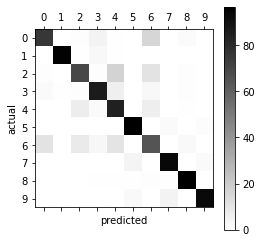

In [6]:
wandb.init(project = 'Question_4')

algos = ['GD','SGD', 'MiniBatch', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'Adam','Nadam']
configuration = {
    'learning_rate': 0.001,
    'epochs': 10,
    'hidden_layer_count': 3,
    'size_hidden_layers': 128,
    'optimizer': 'Adam',
    'batch_size': 128,
    'activation': 'Relu',
    'weight_initializations': 'Xavier',
    'weight_decay': 0,
    'loss_function': 'CE',
}

def train():
  
  wandb.init(project ='confusion_matrix',config=configuration, magic=True,reinit = True)
  wandb.run.name = '/batch_size/'+str(wandb.config.batch_size)+'/learning_rate/'+ str(wandb.config.learning_rate)+'/epochs/'+str(wandb.config.epochs)+ '/optimizer/'+str(wandb.config.optimizer)+ '/hidden_layer_count/'+str(wandb.config.hidden_layer_count)+'/size_hidden_layers/'+str(wandb.config.size_hidden_layers)+ '/activation/'+str(wandb.config.activation)+'/weight_decay/'+str(wandb.config.weight_decay)+'/weight_initializations/'+str(wandb.config.weight_initializations)+'/loss_function/'+str(wandb.config.loss_function)

  
  # [configuration['size_hidden_layers']] * configuration['hidden_layer_count']

  hidden_layer_count = wandb.config.hidden_layer_count 
  size_hidden_layers = wandb.config.size_hidden_layers 
  model = FFNetwork(X_train, Y_train,
                epochs = wandb.config.epochs, 
                hidden_layer_count =  wandb.config.hidden_layer_count,
                hidden_layers = [size_hidden_layers]*hidden_layer_count,
                learning_rate = wandb.config.learning_rate,
                batch_size = wandb.config.batch_size,
                activation=wandb.config.activation,
                weight_init=wandb.config.weight_initializations,
                loss = wandb.config.loss_function,
                weight_decay = wandb.config.weight_decay)

  algos = ['GD','SGD', 'MiniBatch', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'Adam','Nadam']
  ['momentum','sgd','rmsprop','nesterov','adam','nadam']
  optimizer = wandb.config.optimizer
  if optimizer == 'SGD':
    weights = model.fit(X_train, Y_train, X_val, Y_val, algo= 'SGD')
  elif optimizer == 'Momentum':
    weights =model.fit(X_train, Y_train, X_val, Y_val, algo= 'Momentum')
  elif optimizer == 'NAG':
    weights =model.fit(X_train, Y_train, X_val, Y_val, algo= 'NAG')
  elif optimizer == 'RMSProp':
    weights =model.fit(X_train, Y_train, X_val, Y_val, algo= 'RMSProp')
  elif optimizer == 'Adam':
    weights =model.fit(X_train, Y_train, X_val, Y_val, algo='Adam')
  elif optimizer =='nadam':
    weights =model.fit(X_train, Y_train, X_val, Y_val, algo= 'Nadam')
  else:
    print('Invalid optimizer')



  confusion_matrix = model.confusion_matrix(X_test, Y_test)
  print(confusion_matrix)
  model.confusion_matrix_plot(confusion_matrix)

if __name__ == '__main__':
  train()
  wandb.finish()




# Sweeping the model

In [ ]:
try:
    import wandb
    wandb_available = True
except ImportError:
    wandb_available = False

if wandb_available:
    sweep_config = {
        'method': 'bayes',
        'name': 'Assignement1',
        'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
        'parameters': {
          'epochs': {'values': [10, 15, 20]},#150
          'hidden_layer_count':{'values': [3, 4, 5]},
          'size_hidden_layers':{'values': [32,128, 256, 512]},
          'learning_rate':{'values': [0.001, 0.0001]},
          'optimizer':{'values': [ 'Momentum', 'NAG', 'RMSProp', 'Adam', 'nadam']},
          'batch_size':{'values': [32, 64, 128]},
          'activation':{'values': ['sigmoid','tanh', 'Relu']},
          'weight_initializations':{'values': ['random','Xavier']},
          'weight_decay':{'values': [0, 0.05,0.0005 ]}}
        }
     

    # Create the sweep and run the training function
    sweep_id = wandb.sweep(sweep_config, project='Question_4_Best_Model')
    wandb.agent(sweep_id, function=train)
else:
    print('wandb library not available')


Create sweep with ID: zhgxkzew
Sweep URL: https://wandb.ai/ed22s009/Question_4_Best_Model/sweeps/zhgxkzew


wandb: Agent Starting Run: wq0n8n5f with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 15
wandb: 	hidden_layer_count: 4
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/15 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.1721498102279194, Train Accuracy: 0.863574074074074, Val Loss: 0.17272025413281836, Val Accuracy: 0.8553333333333333
Epoch: 10, Train Loss: 0.16916941722521053, Train Accuracy: 0.884, Val Loss: 0.16988582538282168, Val Accuracy: 0.873
Epoch: 15, Train Loss: 0.1670605034720275, Train Accuracy: 0.8936296296296297, Val Loss: 0.16822692906913495, Val Accuracy: 0.8758333333333334
Model trained successfully !
[[747   1  14  21   2   1 201   0  13   0]
 [  5 954   0  28   7   0   6   0   0   0]
 [  9   2 786   9 117   1  74   0   2   0]
 [ 28   4  14 885  27   1  37   0   4   0]
 [  0   0 104  38 793   0  59   0   6   0]
 [  0   0   0   0   0 957   0  22   2  19]
 [ 93   2  92  18  86   0 697   0  12   0]
 [  0   0   0   0   0  20   0 913   0  67]
 [  2   0   2   4   2   5  11   4 970   0]
 [  0   0   0   0   0  10   0  22   1 967]]


accuracy,▁▇▇▇▇▇█████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▃▃▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▇▇▇███████████
val_loss,█▅▃▃▂▂▂▂▂▂▁▁▁▁▁
accuracy,0.89363
epoch,15
loss,0.16706
val_accuracy,0.87583
val_loss,0.16823


wandb: Agent Starting Run: wc6lasj7 with config:
wandb: 	activation: Relu
wandb: 	batch_size: 128
wandb: 	epochs: 15
wandb: 	hidden_layer_count: 4
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: RMSProp
wandb: 	size_hidden_layers: 512
wandb: 	weight_decay: 0.0005
wandb: 	weight_initializations: random
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/15 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.06856254660925022, Train Accuracy: 0.7474259259259259, Val Loss: 0.07037407945740794, Val Accuracy: 0.7408333333333333
Epoch: 10, Train Loss: 0.043060711791899776, Train Accuracy: 0.851574074074074, Val Loss: 0.045270530848236006, Val Accuracy: 0.845
Epoch: 15, Train Loss: 0.03462906579156944, Train Accuracy: 0.8777222222222222, Val Loss: 0.038018751043926886, Val Accuracy: 0.867
Model trained successfully !
[[767   0   5  65   8   1 140   0  14   0]
 [  6 953   0  32   6   0   2   0   1   0]
 [ 12   0 698  11 189   0  85   0   5   0]
 [ 17   7   3 886  52   0  29   0   6   0]
 [  0   1  69  25 856   0  45   0   4   0]
 [  0   0   0   0   0 923   0  54   4  19]
 [117   0  84  46 128   2 602   0  21   0]
 [  0   0   0   0   0  12   0 978   0  10]
 [  0   0   1   6   5   4   7   5 971   1]
 [  0   0   0   0   0   4   1  75   0 920]]


accuracy,▁▃▄▅▅▆▆▇▇▇█████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▇▅▅▅▄▃▃▂▂▂▁▁▁▁
val_accuracy,▁▃▄▅▅▆▆▇▇▇█████
val_loss,█▇▅▅▄▄▃▃▂▂▁▁▁▁▁
accuracy,0.87772
epoch,15
loss,0.03463
val_accuracy,0.867
val_loss,0.03802


wandb: Agent Starting Run: 26rxgm9f with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 15
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: RMSProp
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0.0005
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/15 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23025894294138127, Train Accuracy: 0.10005555555555555, Val Loss: 0.23026147932035873, Val Accuracy: 0.0995
Epoch: 10, Train Loss: 0.2302575300737697, Train Accuracy: 0.10092592592592593, Val Loss: 0.23026585925395943, Val Accuracy: 0.09166666666666666
Epoch: 15, Train Loss: 0.22230085759420215, Train Accuracy: 0.20066666666666666, Val Loss: 0.22244562691871064, Val Accuracy: 0.193
Model trained successfully !
[[   0  971    0    0    0    0    0   29    0    0]
 [   0  998    0    0    0    0    0    2    0    0]
 [   0  986    0    0    0    0    0   14    0    0]
 [   0  995    0    0    0    0    0    5    0    0]
 [   0  991    0    0    0    0    0    9    0    0]
 [   0    2    0    0    0    0    0  998    0    0]
 [   0  956    0    0    0    0    0   44    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0   53    0    0    0    0    0  947    0    0]
 [   0    3    0    0    0    0    0  997    0    0]]


accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁█
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█████████████▇▁
val_accuracy,▂▂▂▂▂▂▂▂▁▁▁▁▁▁█
val_loss,█████████████▇▁
accuracy,0.20067
epoch,15
loss,0.2223
val_accuracy,0.193
val_loss,0.22245


wandb: Agent Starting Run: tna9r0cq with config:
wandb: 	activation: Relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0
wandb: 	weight_initializations: random
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23025846464237562, Train Accuracy: 0.10024074074074074, Val Loss: 0.230258768795297, Val Accuracy: 0.09783333333333333
Epoch: 10, Train Loss: 0.23025841493111038, Train Accuracy: 0.10024074074074074, Val Loss: 0.23025916273279126, Val Accuracy: 0.09783333333333333
Model trained successfully !
[[   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]]


accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▇▅▅▅▄▂▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,▁▂▂▃▃▄▅▆▇█
accuracy,0.10024
epoch,10
loss,0.23026
val_accuracy,0.09783
val_loss,0.23026


wandb: Agent Starting Run: xlp2yi74 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.21278120752919677, Train Accuracy: 0.4487777777777778, Val Loss: 0.21300192824467096, Val Accuracy: 0.43716666666666665
Epoch: 10, Train Loss: 0.20978537638621433, Train Accuracy: 0.5608888888888889, Val Loss: 0.21000420365629122, Val Accuracy: 0.5538333333333333
Model trained successfully !
[[  0  15 778 161   0   1  24   0  21   0]
 [  0 859  40  96   0   0   4   0   1   0]
 [  0   2 946  26   0   0  12   0  14   0]
 [  0   9  43 932   0   0  11   0   5   0]
 [  0  16 839 102   0   0  37   0   6   0]
 [  0   0   0   1   0 918   0  66  15   0]
 [  0   8 797 130   0   0  31   0  34   0]
 [  0   0   0   0   0  65   0 935   0   0]
 [  0   1  20  15   0   5   3   4 952   0]
 [  0   0   0   0   0  46   0 953   1   0]]


accuracy,▁▃▅▅▆▆▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▃▄▅▆▆▇███
val_loss,█▄▃▂▂▂▁▁▁▁
accuracy,0.56089
epoch,10
loss,0.20979
val_accuracy,0.55383
val_loss,0.21


wandb: Agent Starting Run: 231b93s6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	hidden_layer_count: 3
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0.0005
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23024102163933335, Train Accuracy: 0.10092592592592593, Val Loss: 0.23026223187618683, Val Accuracy: 0.09166666666666666
Epoch: 10, Train Loss: 0.21705466020394612, Train Accuracy: 0.2767222222222222, Val Loss: 0.21722291312579128, Val Accuracy: 0.26366666666666666
Model trained successfully !
[[ 822    0    0  157    0    0    0    2   19    0]
 [ 934    0    0   64    0    0    0    0    2    0]
 [ 642    0    0  349    0    0    0    0    9    0]
 [ 726    0    0  271    0    0    0    0    3    0]
 [ 771    0    0  217    0    0    0    0   12    0]
 [   0    0    0    1    0    0    0  921   78    0]
 [ 599    0    0  368    0    0    0    0   33    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [  20    0    0  108    0    0    0  172  700    0]
 [   0    0    0    3    0    0    0  965   32    0]]


accuracy,▁▁▁▁▁▁▁▅▆█
epoch,▁▂▃▃▄▅▆▆▇█
loss,██████▇▂▂▁
val_accuracy,▁▁▁▁▁▁▁▅▆█
val_loss,██████▇▂▂▁
accuracy,0.27672
epoch,10
loss,0.21705
val_accuracy,0.26367
val_loss,0.21722


wandb: Agent Starting Run: 6w8ok7nx with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 15
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Adam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: random
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/15 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23025805445101824, Train Accuracy: 0.10092592592592593, Val Loss: 0.23026950565245097, Val Accuracy: 0.09166666666666666
Epoch: 10, Train Loss: 0.23025788726756932, Train Accuracy: 0.10092592592592593, Val Loss: 0.23027057977288426, Val Accuracy: 0.09166666666666666
Epoch: 15, Train Loss: 0.2302578797813605, Train Accuracy: 0.10092592592592593, Val Loss: 0.2302706995955074, Val Accuracy: 0.09166666666666666
Model trained successfully !
[[   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]]


accuracy,▁▁█████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,██▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▂▁▁▂▂▂▂▃▃▃▃▃▃▃
accuracy,0.10093
epoch,15
loss,0.23026
val_accuracy,0.09167
val_loss,0.23027


wandb: Agent Starting Run: ieeokvsv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: RMSProp
wandb: 	size_hidden_layers: 512
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/10 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.13352200886784335, Train Accuracy: 0.8241851851851851, Val Loss: 0.13400744403053447, Val Accuracy: 0.823
Epoch: 10, Train Loss: 0.12212097217647529, Train Accuracy: 0.8680925925925926, Val Loss: 0.1237542458785348, Val Accuracy: 0.8541666666666666
Model trained successfully !
[[732   3  15  30   7   2 204   0   7   0]
 [  4 955   3  26   6   0   6   0   0   0]
 [  8   2 775   8 160   0  46   0   1   0]
 [ 24  10  13 875  35   1  41   0   1   0]
 [  0   1 112  44 827   0  16   0   0   0]
 [  0   0   0   1   0 921   0  43   1  34]
 [ 93   1 129  26 198   0 545   0   8   0]
 [  0   0   0   0   0  23   0 940   0  37]
 [  0   1  13   7  24   6  26   4 919   0]
 [  0   0   0   0   0   2   0  49   1 948]]


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▄▂▂▁▁▁▁
val_accuracy,▁▆▇▇██████
val_loss,█▅▄▄▂▂▁▁▁▁
accuracy,0.86809
epoch,10
loss,0.12212
val_accuracy,0.85417
val_loss,0.12375


wandb: Agent Starting Run: 4p0h0rbk with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 20
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/20 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23025114935554794, Train Accuracy: 0.10092592592592593, Val Loss: 0.2302574464688592, Val Accuracy: 0.09166666666666666
Epoch: 10, Train Loss: 0.19833633565172984, Train Accuracy: 0.4245, Val Loss: 0.19867794038032788, Val Accuracy: 0.4226666666666667
Epoch: 15, Train Loss: 0.1952512114038346, Train Accuracy: 0.47574074074074074, Val Loss: 0.1957708169207634, Val Accuracy: 0.4656666666666667
Epoch: 20, Train Loss: 0.19485857923046573, Train Accuracy: 0.48103703703703704, Val Loss: 0.19545147507297642, Val Accuracy: 0.4646666666666667
Model trained successfully !
[[  0 839   0  60  85   0   0   0  16   0]
 [  0 938   0  24  38   0   0   0   0   0]
 [  0 945   0  22  30   0   0   0   3   0]
 [  0  46   0 853  78   0   0   0  23   0]
 [  0 817   0  61 117   0   0   0   5   0]
 [  0   0   0   1   0 928   0  62   9   0]
 [  0 834   0  55  88   0   0   0  23   0]
 [  0   0   0   0   0  62   0 938   0   0]
 [  0   7   0  31   6   4   0   4 948   0]
 [  0   0   0   1   

accuracy,▁▁▁▁▁▃▄▅▅▇▇█████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█████▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▃▄▅▆▇▇█████████
val_loss,█████▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,0.48104
epoch,20
loss,0.19486
val_accuracy,0.46467
val_loss,0.19545


wandb: Agent Starting Run: v12jgkc6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 20
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: nadam
wandb: 	size_hidden_layers: 128
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/20 [00:00<?, ?epoch/s]

Epoch: 5, Train Loss: 0.23025114935554794, Train Accuracy: 0.10092592592592593, Val Loss: 0.2302574464688592, Val Accuracy: 0.09166666666666666
Epoch: 10, Train Loss: 0.19833633565172984, Train Accuracy: 0.4245, Val Loss: 0.19867794038032788, Val Accuracy: 0.4226666666666667
Epoch: 15, Train Loss: 0.1952512114038346, Train Accuracy: 0.47574074074074074, Val Loss: 0.1957708169207634, Val Accuracy: 0.4656666666666667
Epoch: 20, Train Loss: 0.19485857923046573, Train Accuracy: 0.48103703703703704, Val Loss: 0.19545147507297642, Val Accuracy: 0.4646666666666667
Model trained successfully !
[[  0 839   0  60  85   0   0   0  16   0]
 [  0 938   0  24  38   0   0   0   0   0]
 [  0 945   0  22  30   0   0   0   3   0]
 [  0  46   0 853  78   0   0   0  23   0]
 [  0 817   0  61 117   0   0   0   5   0]
 [  0   0   0   1   0 928   0  62   9   0]
 [  0 834   0  55  88   0   0   0  23   0]
 [  0   0   0   0   0  62   0 938   0   0]
 [  0   7   0  31   6   4   0   4 948   0]
 [  0   0   0   1   

accuracy,▁▁▁▁▁▃▄▅▅▇▇█████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█████▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▃▄▅▆▇▇█████████
val_loss,█████▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,0.48104
epoch,20
loss,0.19486
val_accuracy,0.46467
val_loss,0.19545


wandb: Agent Starting Run: lt8o7hdd with config:
wandb: 	activation: Relu
wandb: 	batch_size: 32
wandb: 	epochs: 20
wandb: 	hidden_layer_count: 5
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adam
wandb: 	size_hidden_layers: 256
wandb: 	weight_decay: 0.05
wandb: 	weight_initializations: Xavier
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


  0%|          | 0/20 [00:00<?, ?epoch/s]